In [ ]:
!pip install xgboost
!pip install catboost
!pip install lightgbm
import xgboost as xgb
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score as RSquared
from sklearn.ensemble import  RandomForestRegressor
from catboost import CatBoostRegressor, Pool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def MSE(target, pred):
  N = len(target)
  return np.sum((target-pred)**2)/N

def RRMSE(target, pred):
    num = np.sum((target - pred) ** 2)
    dem = np.sum((np.mean(target) - target) ** 2)
    if(dem == 0):
        print(target.shape)
        print(pred.shape)
        print()
    return np.sqrt(num/dem)

def RMSE(target, pred):
    return np.sqrt(MSE(target, pred))

train_data = pd.read_csv('oxides_Tg_train.csv')
test_data = pd.read_csv('oxides_Tg_test.csv')

In [ ]:
train_data.head()

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U,Tg
0,0.000000,0.0,0.016713,0.629526,0.000000,0.000000,0.000000,0.000000,0.167131,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,599.15
1,0.136364,0.0,0.318182,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,770.15
2,0.000000,0.0,0.000000,0.561469,0.127436,0.000000,0.000000,0.186657,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,846.15
3,0.000000,0.0,0.030469,0.629816,0.000000,0.026315,0.062413,0.210063,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,997.15
4,0.000000,0.0,0.243386,0.584362,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.148736,0.0,0.0,0.0,693.15


In [ ]:
#XGBoost
xgbr = xgb.XGBRegressor(
    n_estimators=3500,
    eta=0.1,
    max_depth=4,
    objective='reg:squarederror'
    )
xgbr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = xgbr.predict(test_data.iloc[:, :-1])
xgb_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))


print(f"R2Score XGBoost: {xgb_rmse}")
print(f'RMSE XGBoost: {RMSE(test_data.iloc[:, -1], y_pred)}')
print(f'RRMSE XGBoost: {RRMSE(test_data.iloc[:, -1], y_pred)}')


R2Score XGBoost: 0.9771521368842377
RMSE XGBoost: 32.451752890955404
RRMSE XGBoost: 0.2125410581101166


In [ ]:
#CatBoost
cbr = CatBoostRegressor(iterations=2000, learning_rate=0.2,
                            max_depth=7, loss_function='RMSE')


cbr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = cbr.predict(test_data.iloc[:, :-1])

cat_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))

print(f"R2Score CATBoost: {cat_rmse}")
print(f'RMSE CATBoost: {RMSE(test_data.iloc[:, -1], y_pred)}')
print(f'RRMSE CATBoost: {RRMSE(test_data.iloc[:, -1], y_pred)}')


0:	learn: 134.4055193	total: 90.7ms	remaining: 3m 1s
1:	learn: 121.0658731	total: 125ms	remaining: 2m 5s
2:	learn: 111.2740674	total: 161ms	remaining: 1m 46s
3:	learn: 103.0217359	total: 208ms	remaining: 1m 43s
4:	learn: 96.7353072	total: 243ms	remaining: 1m 36s
5:	learn: 91.8673940	total: 276ms	remaining: 1m 31s
6:	learn: 88.1731341	total: 314ms	remaining: 1m 29s
7:	learn: 84.2465838	total: 348ms	remaining: 1m 26s
8:	learn: 81.7356213	total: 379ms	remaining: 1m 23s
9:	learn: 78.9212699	total: 410ms	remaining: 1m 21s
10:	learn: 76.4549865	total: 443ms	remaining: 1m 20s
11:	learn: 74.5190504	total: 475ms	remaining: 1m 18s
12:	learn: 72.6768124	total: 505ms	remaining: 1m 17s
13:	learn: 70.9826225	total: 545ms	remaining: 1m 17s
14:	learn: 69.5733282	total: 578ms	remaining: 1m 16s
15:	learn: 68.4219794	total: 610ms	remaining: 1m 15s
16:	learn: 67.3532162	total: 645ms	remaining: 1m 15s
17:	learn: 66.1572344	total: 683ms	remaining: 1m 15s
18:	learn: 65.2861568	total: 714ms	remaining: 1m 14s


In [ ]:
#RF Regressor (differently tuned from author)
rfr = RandomForestRegressor(n_estimators=300)

rfr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = rfr.predict(test_data.iloc[:, :-1])

rf_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))

print(f"R2Score RFR: {rf_rmse}")
print(f'RMSE RFR: {RMSE(test_data.iloc[:, -1], y_pred)}')
print(f'RRMSE RFR: {RRMSE(test_data.iloc[:, -1], y_pred)}')

R2Score RFR: 0.9781268381330126
RMSE RFR: 31.75983028630166
RRMSE RFR: 0.20800934720323358


In [ ]:
#LGBM Regressor (best in this case!)
import lightgbm as lgbm

lgbm_reg = lgbm.LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.09
)
lgbm_reg.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = lgbm_reg.predict(test_data.iloc[:, :-1])
lgbm_rsquared =  np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))

print(f"R squared for LightGBM: {lgbm_rsquared}")
print(f'RMSE LGBM: {RMSE(test_data.iloc[:, -1], y_pred)}')
print(f'RRMSE LGBM: {RRMSE(test_data.iloc[:, -1], y_pred)}')


R squared for LightGBM: 0.9808609988534727
RMSE LGBM: 29.72911334790111
RRMSE LGBM: 0.19470927283559952


In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.6 MB/s eta 0:00:00


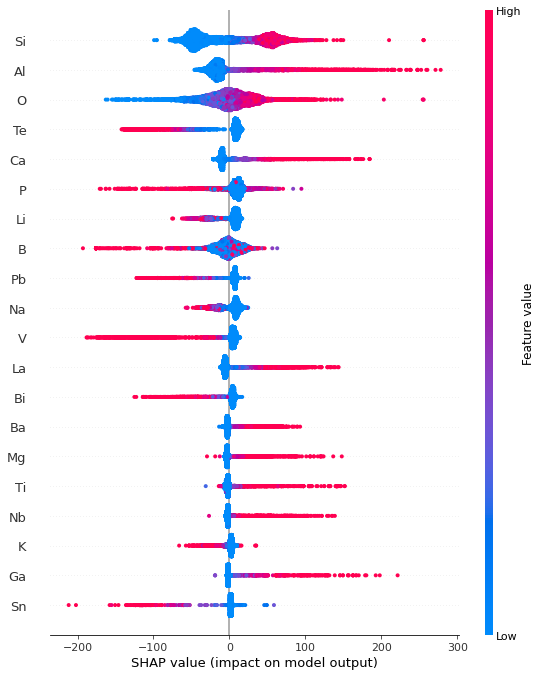

In [ ]:
shap_values = cbr.get_feature_importance(Pool(test_data.iloc[:,:-1],label = test_data.iloc[:,-1] ), type = "ShapValues")

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.summary_plot(shap_values,test_data.iloc[:,:-1])

In [ ]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.4 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate regression dataset
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define quantum circuit for the feature map
def feature_map(x, params):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.RZ(x[2], wires=2)
    qml.CRZ(params[0], wires=[0,1])
    qml.CRZ(params[1], wires=[0,2])
    qml.CRZ(params[2], wires=[1,2])
    qml.RX(params[3], wires=0)
    qml.RY(params[4], wires=1)
    qml.RZ(params[5], wires=2)

# Define the variational quantum circuit
def variational_circuit(params):
    qml.RX(params[6], wires=0)
    qml.RY(params[7], wires=1)
    qml.RZ(params[8], wires=2)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.RX(params[9], wires=0)
    qml.RY(params[10], wires=1)
    qml.RZ(params[11], wires=2)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])

# Define the quantum node for the quantum circuit
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(params, x):
    feature_map(x, params[:6])
    variational_circuit(params[6:])
    return qml.expval(qml.PauliZ(2))

# Define the cost function
def cost(params, X, Y):
    predictions = np.array([circuit(params, x) for x in X])
    return np.mean((predictions - Y)**2)

# Initialize the parameters
params = np.random.randn(12)

# Define the optimizer
opt = qml.AdamOptimizer(stepsize=0.1)

# Train the model
for i in range(100):
    params = opt.step(lambda v: cost(v, X_train, y_train), params)

# Test the model
predictions = np.array([circuit(params, x) for x in X_test])
print('Mean Squared Error:', np.mean((predictions - y_test)**2))


IndexError: ignored

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the diabetes dataset and split into training and test sets
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define the quantum circuit
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def circuit(params, x):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.RY(params[3], wires=3)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[2, 3])
    qml.RY(params[4], wires=1)
    qml.RY(params[5], wires=3)
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.RY(params[6], wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.RY(params[7], wires=0)
    qml.RY(params[8], wires=1)
    qml.RY(params[9], wires=2)
    qml.RY(params[10], wires=3)
    return qml.expval(qml.PauliZ(0))

# Define the cost function
def cost(params, X, Y):
    predictions = np.array([circuit(params, x) for x in X])
    return np.mean((predictions - Y) ** 2)

# Initialize the parameters and optimize them using gradient descent
np.random.seed(0)
params = np.random.normal(0, np.pi, size=11)
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)
for i in range(200):
    params = optimizer.step(lambda p: cost(p, X_train, y_train), params)

# Evaluate the model on the test set
predictions = np.array([circuit(params, x) for x in X_test])
mse = np.mean((predictions - y_test) ** 2)
print("Mean squared error:", mse)


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
!pip install qiskit
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
!pip install qiskit_machine_learning
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

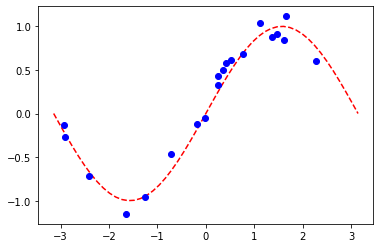

In [ ]:
num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x: np.sin(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
plt.show()

In [ ]:
X

array([[-1.63893001],
       [ 0.51951013],
       [ 1.60993062],
       [-0.17819662],
       [ 1.47205721],
       [-2.92510676],
       [ 0.77120226],
       [ 1.35984829],
       [-2.41208453],
       [ 1.65036427],
       [ 0.42313797],
       [-0.02118181],
       [ 2.28386928],
       [ 0.34984839],
       [-0.71962921],
       [-1.25253087],
       [ 1.1234253 ],
       [-2.90977662],
       [ 0.24803949],
       [ 0.24459537]])

In [ ]:
y

array([-1.15203762,  0.61354786,  0.84741468, -0.12012338,  0.90951734,
       -0.12856161,  0.67803628,  0.88294895, -0.71314969,  1.11602534,
        0.57784765, -0.05326185,  0.60084964,  0.50107115, -0.46173375,
       -0.95409053,  1.04271343, -0.27007007,  0.33067533,  0.42607775])

In [ ]:
# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(65, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

# construct a circuit
qc = QuantumCircuit(1)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [ ]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=5),
    # callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(X, y)

0.9772587476304375

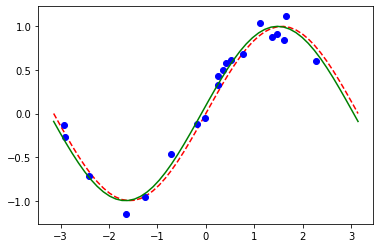

In [ ]:
# plot target function
plt.plot(X_, f(X_), "r--")

# plot data
plt.plot(X, y, "bo")

# plot fitted line
y_ = regressor.predict(X_)
plt.plot(X_, y_, "g-")
plt.show()

In [ ]:
param_x = Parameter("x")
feature_map = QuantumCircuit(65, name="fm")
feature_map.ry(param_x, 0)
vqr = VQR(
    feature_map=feature_map,
    # ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=5),
    # callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
# plt.rcParams["figure.figsize"] = (12, 6)

# fit regressor
vqr.fit(X, y)

# return to default figsize
# plt.rcParams["figure.figsize"] = (6, 4)

# score result
vqr.score(X, y)

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('oxides_Tg_train.csv')
test_data = pd.read_csv('oxides_Tg_test.csv')

In [ ]:
# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(65, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(65, name="vf")
ansatz.ry(param_y, 0)

# construct a circuit
qc = QuantumCircuit(65)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
vqr = VQR(
    # feature_map=feature_map,
    ansatz=ansatz,
    # optimizer=L_BFGS_B(maxiter=5),
    # callback=callback_graph,
)

In [ ]:
X,y=train_data.iloc[:, :-1], train_data.iloc[:, -1]

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
# plt.rcParams["figure.figsize"] = (12, 6)

# fit regressor
vqr.fit(X, y)

# return to default figsize
# plt.rcParams["figure.figsize"] = (6, 4)

# score result
vqr.score(X, y)

KeyboardInterrupt: ignored

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install qiskit_quantum_knn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install qiskit.aqua

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 KB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.7/198.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 14.3 MB/s eta 0:00:00
  Created wheel for dlx: filename=dlx-1.0.4-py3-none-any.whl size=5719 sha256=addc5e2d98206755

In [ ]:
# !pip install qiskit-terra==0.22
# !pip install qiskit==0.31.0
# !pip install qiskit==0.27.0
!pip install qiskit==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.9/565.9 KB 8.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from qiskit_quantum_knn.qknn import QKNeighborsClassifier
from qiskit_quantum_knn.encoding import analog
from qiskit.utils import QuantumInstance
import qiskit as qk
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv("oxides_Tg_train.csv")
y_data=df['Tg']
df=df.drop(['Tg'], axis=1)
    
x_data=df.to_numpy().astype(float)

label_encoder = LabelEncoder()
labels=label_encoder.fit_transform(y_data)
# print(labels)
# print(x_data)
# print(y_data)
# data_raw[:, :n_variables]

# qd=analog.encode(x_data)
# qd

backend = qk.BasicAer.get_backend('qasm_simulator')
instance = QuantumInstance(backend, shots=20)

# initialising the qknn model
qknn = QKNeighborsClassifier(
    n_neighbors=3,
    quantum_instance=instance
)

# should be positive power of 2
n_variables = 2
# can be any positive integer
n_train_points = 4
# can be any positive integer
n_test_points = 2

# now pick these indices from the data
encoded_data = analog.encode(x_data[:, :n_variables])
print(encoded_data)
print(labels)


train_data = encoded_data[:n_train_points]
train_labels = labels[:n_train_points]

#print(train_labels)

test_data = encoded_data[n_train_points:(n_train_points+n_test_points), :n_variables]
test_labels = labels[n_train_points:(n_train_points+n_test_points)]

qknn.fit(train_data, train_labels)
qknn_prediction = qknn.predict(test_data)

#print(encoded_data)
# print(test_data)
print(qknn_prediction)
print(test_labels)

[[0. 0.]
 [1. 0.]
 [0. 0.]
 ...
 [1. 0.]
 [0. 0.]
 [0. 0.]]
[224 395 471 ... 467 588 125]


QiskitError: ignored